In [1]:
# importamos librerias 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
# cargamos el dataset
df = pd.read_csv('automobile.csv')

In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Data processing

In [5]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
195,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
61,0,115.0,mazda,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245
183,2,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68,4500,37,42,9495
111,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.7,3.52,21.0,95,4150,25,25,17075
140,0,102.0,subaru,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233


In [6]:
df.shape

(202, 26)

In [7]:
# quitar '?'
df = df[df['bore']!='?']
df = df[df['stroke']!='?']
df = df[df['horsepower']!='?']
df = df[df['peak-rpm']!='?']

In [8]:
# data type
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('int')
df['peak-rpm'] = df['peak-rpm'].astype('int')

In [9]:
cat_cols = df.select_dtypes(include='O').columns.to_list()

In [10]:
cat_cols

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [11]:
df[cat_cols] = df[cat_cols].astype('category')

#### Missing values

In [12]:
df.isnull().sum()

symboling             0
normalized-losses    35
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [13]:
df = df.drop(['normalized-losses'], axis=1)

In [14]:
df.shape

(196, 25)

# Estrategias de selección de características - Feature Selection

### Características no correlacionadas

Características numéricas

<AxesSubplot:>

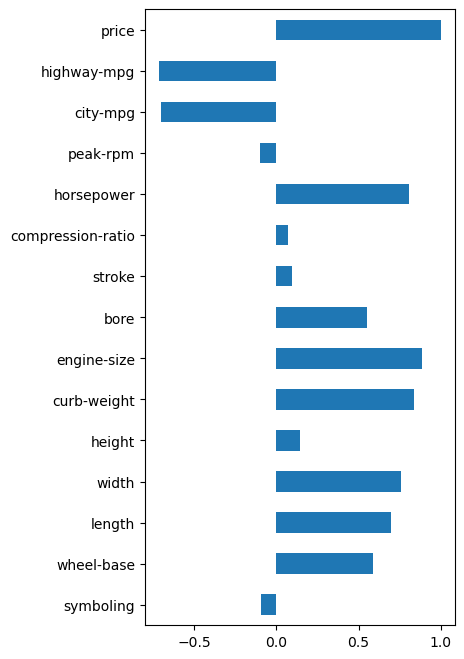

In [15]:
# correlación entre target y características
(df.corr().loc['price']
 .plot(kind='barh', figsize=(4,8))) 

In [16]:
# descartar características numéricas que no se correlacionen con el objetivo (umbral <0.2)
corr = abs(df.corr().loc['price'])
corr = corr[corr<0.2]
cols_to_drop = corr.index.to_list()
df1 = df.drop(cols_to_drop, axis=1)

In [17]:
len(df1.columns)

20

### Características de baja varianza

In [18]:
# varianza de características numéricas
(df
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

symboling             1.5230769230769245
wheel-base             37.94025405546827
length                 155.9424623233909
width                  4.570510465724747
height                5.7287815279958165
curb-weight            275205.6007064364
engine-size            1708.835871271584
bore                 0.07456791993720567
stroke               0.09821329147043424
compression-ratio     16.418573333333338
horsepower            1427.3492412349553
peak-rpm              218614.33804290948
city-mpg               40.97485609628467
highway-mpg            46.57443746729464
price                  65020222.64615383
dtype: object

In [19]:
df['bore'].describe()

count    196.000000
mean       3.331684
std        0.273071
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

### Multicolinealidad

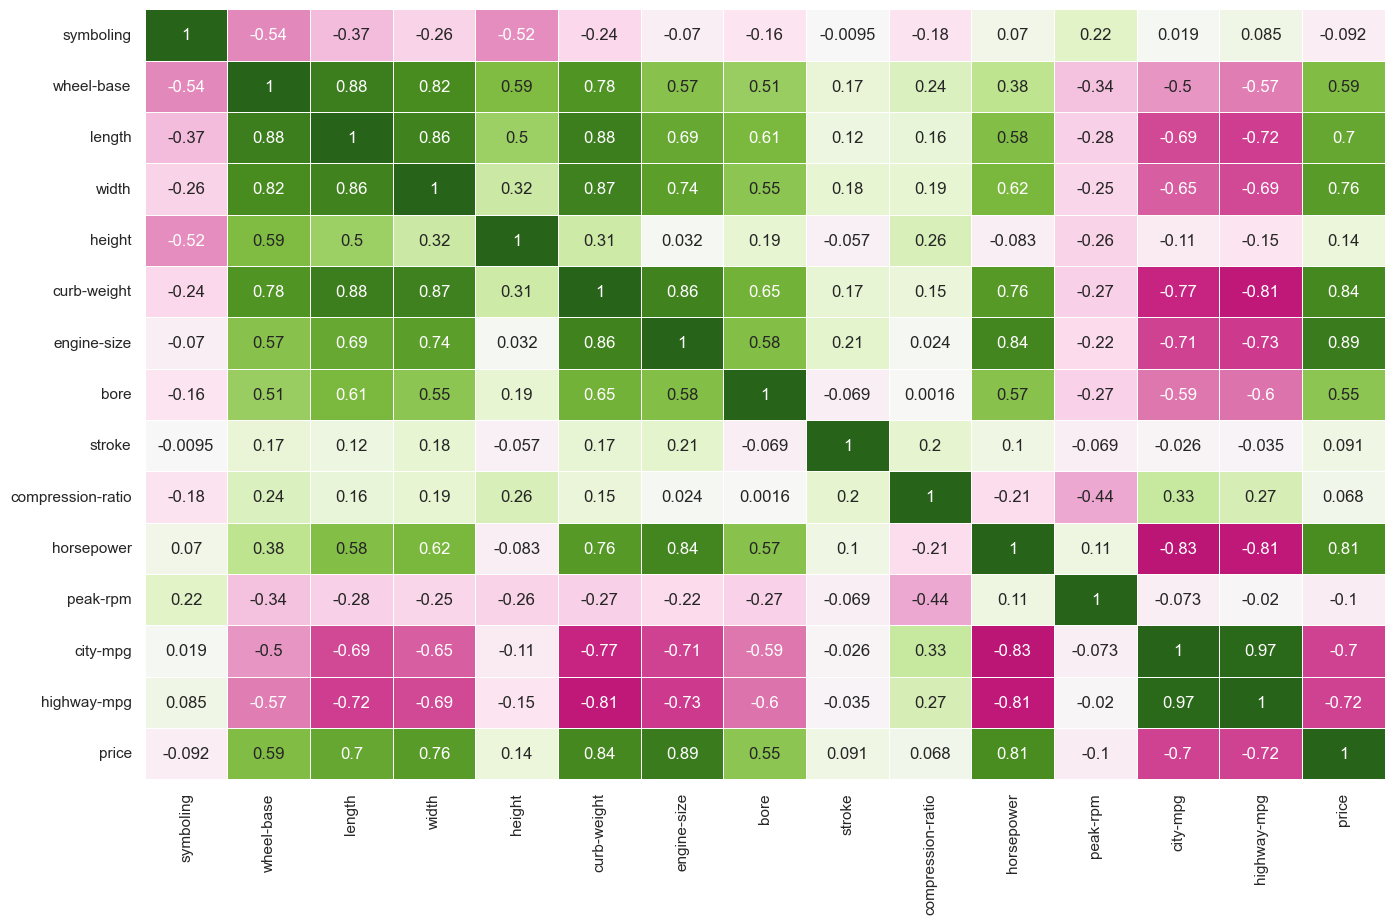

In [20]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

In [21]:
# drop correlated features
df2 = df.drop(['curb-weight', 'engine-size'], axis=1)

In [22]:
len(df2.columns)

23

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [23]:
# dummies
df = pd.get_dummies(df, drop_first=True)

In [24]:
# X features
X = df.drop('price', axis=1)

# y target
y = df['price']

In [25]:
X.shape

(196, 59)

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

In [28]:
X_train = pd.DataFrame(X_train, columns = X.columns.to_list())
X_test = pd.DataFrame(X_test, columns = X.columns.to_list())

### Forward selection 

In [29]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [30]:
forward_selection(X,y)

['engine-size',
 'make_bmw',
 'width',
 'engine-location_rear',
 'make_mercedes-benz',
 'curb-weight',
 'peak-rpm',
 'make_jaguar',
 'num-of-cylinders_three']

### Backward elimination

In [31]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [32]:
backward_elimination(X,y)

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'stroke',
 'peak-rpm',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_mazda',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'aspiration_turbo',
 'body-style_hatchback',
 'engine-location_rear',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'num-of-cylinders_five',
 'num-of-cylinders_four',
 'num-of-cylinders_six',
 'num-of-cylinders_twelve',
 'fuel-system_2bbl']

### Selección de características basada en importancia de características

In [33]:
model = RandomForestClassifier(n_estimators=200, random_state=0)

model.fit(X,y)

RandomForestClassifier(n_estimators=200, random_state=0)

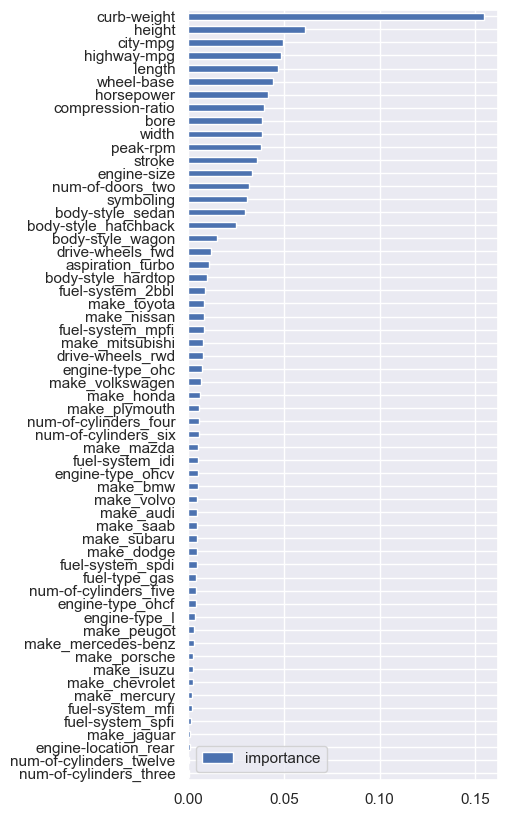

In [34]:
importances = model.feature_importances_


cols = X.columns
(pd.DataFrame(importances, cols, columns = ['importance'])
 .sort_values(by='importance', ascending=True)
 .plot(kind='barh', figsize=(4,10))
);

### Selección de características automatizada con `sci-kit learn`

In [35]:

from sklearn.feature_selection import (SelectKBest, chi2, SelectPercentile,  
                                       SequentialFeatureSelector)

                                       

### Técnica basada en chi-cuadrado

In [36]:
# seleccione K mejores características
X_best = SelectKBest(chi2, k=10).fit_transform(X_sc,y) 

In [37]:
X_best.shape[1]

10

In [38]:
print('Total de variables originales:' , X_sc.shape[1])
print('Numero de variables reducidas:' , X_best.shape[1])

Total de variables originales: 59
Numero de variables reducidas: 10


In [39]:
# Obtener el índice de las características seleccionadas
selected_indices = SelectKBest(chi2, k=10).fit(X_sc, y).get_support()

# Obtener los nombres de las columnas seleccionadas
selected_columns = X.columns[selected_indices]

print("Columnas seleccionadas:", selected_columns)

Columnas seleccionadas: Index(['make_chevrolet', 'make_isuzu', 'make_jaguar', 'make_mercury',
       'make_porsche', 'engine-location_rear', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'fuel-system_mfi', 'fuel-system_spfi'],
      dtype='object')


In [40]:
# mantener el 75% de las características principales
X_top = SelectPercentile(chi2, percentile = 75).fit_transform(X_sc,y)

# número de mejores características
X_top.shape[1]

44

In [41]:
print('Total de variables originales:' , X_sc.shape[1])
print('Numero de variables reducidas:' , X_top.shape[1])

Total de variables originales: 59
Numero de variables reducidas: 44


In [42]:
# Obtener el índice de las características seleccionadas
selected_indices = SelectPercentile(chi2, percentile = 75).fit(X_sc, y).get_support()

# Obtener los nombres de las columnas seleccionadas
selected_columns = X.columns[selected_indices]

print("Columnas seleccionadas:", selected_columns)

Columnas seleccionadas: Index(['compression-ratio', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'aspiration_turbo', 'num-of-doors_two', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'num-of-cylinders_five', 'num-of-cylinders_six',
       'num-of-cylinders_three', 'num-of-cylinders_twelve', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')


### Sequential selection

In [43]:

model = RandomForestClassifier(n_estimators=100, random_state=0)

In [44]:

selector = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction='backward', cv=2)

In [45]:
selector.fit_transform(X_sc,y)

array([[0.34693878, 0.28947368, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34693878, 0.28947368, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34693878, 0.26315789, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.26530612, 0.28947368, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.51020408, 0.23684211, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51020408, 0.23684211, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:

feature_names = np.array(X.columns)
feature_names[selector.get_support()]

array(['peak-rpm', 'highway-mpg', 'make_mitsubishi',
       'body-style_hatchback', 'body-style_wagon', 'drive-wheels_rwd',
       'num-of-cylinders_four', 'num-of-cylinders_six',
       'fuel-system_2bbl', 'fuel-system_idi'], dtype=object)

### Principal Compoenent Analysis (PCA)

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA()
pca.fit(X_sc)
evr = pca.explained_variance_ratio_

Text(0, 0.5, 'Varianza acumulada explicada')

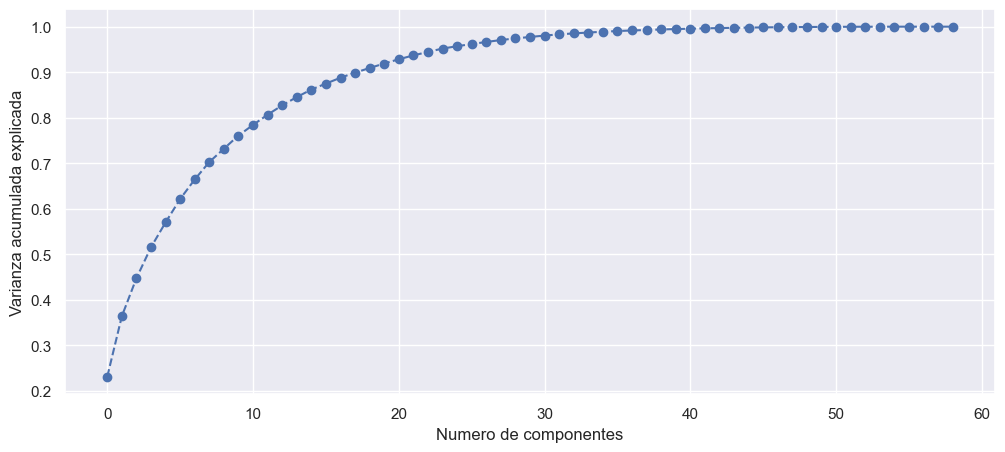

In [49]:
# visualizar la varianza explicada por cada componente

plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="o", linestyle="--")

plt.xlabel("Numero de componentes")
plt.ylabel("Varianza acumulada explicada")